In [8]:
from scipy import stats
from scipy.stats import norm

In [9]:
from __future__ import print_function
print('bounds of distribution lower: %s, upper: %s' % (norm.a, norm.b))

bounds of distribution lower: -inf, upper: inf


In [65]:
rv = norm()
#dir(rv)  # reformatted

In [11]:
dist_continu = [d for d in dir(stats) if
                isinstance(getattr(stats, d), stats.rv_continuous)]

dist_discrete = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_discrete)]

print('number of continuous distributions: %d' % len(dist_continu))

print('number of discrete distributions:   %d' % len(dist_discrete))

number of continuous distributions: 98
number of discrete distributions:   13


In [13]:
#dist_continu

In [15]:
#dist_discrete

In [78]:
norm.cdf(.5)

0.6914624612740131

In [79]:
norm.cdf([-1., 0, 1])

import numpy as np
norm.cdf(np.array([-1., 0, 1]))

array([0.15865525, 0.5       , 0.84134475])

In [80]:
norm.mean(), norm.std(), norm.var()

norm.stats(moments="mv")

(array(0.), array(1.))

In [81]:
 norm.ppf(0.5)

0.0

In [83]:
norm.rvs(size=30)

array([ 2.19898012,  1.14136667,  0.78538058,  0.78377235,  0.16271214,
       -2.25087088,  0.85464313, -0.17627996, -1.84991968, -0.15614249,
        0.20547422, -1.69825153,  0.42879955,  0.75494422,  0.85134163,
       -0.59523039,  0.42967702,  0.48252414, -0.79105556, -1.39202348,
       -0.66614651,  0.76093579, -0.29391885, -0.34900173, -1.10600715,
       -0.5493262 ,  0.86553357,  0.5020055 ,  0.69220377,  0.57130811])

In [90]:
norm.ppf(.9)

1.2815515655446004

In [91]:
np.random.seed(1234)

In [92]:
norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [101]:
from scipy.stats import uniform
uniform.cdf(range(1,100), loc=1, scale=100)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98])

In [120]:
np.mean(norm.rvs(5, size=400))

5.013855995323168

In [121]:
from scipy.stats import gamma
gamma.numargs

gamma.shapes

'a'

In [122]:
gamma(1, scale=2.).stats(moments="mv")

(array(2.), array(4.))

In [137]:
rv = gamma(10000, scale=2.)
rv.mean(), rv.std()

(20000.0, 200.0)

In [138]:
stats.t.isf([0.1, 0.05, 0.01], [[10], [11]])

array([[1.37218364, 1.81246112, 2.76376946],
       [1.36343032, 1.79588482, 2.71807918]])

In [139]:
stats.t.isf([0.1, 0.05, 0.01], [10, 11, 12])

array([1.37218364, 1.79588482, 2.68099799])

In [140]:
ppf(q) = min{x : cdf(x) >= q, x integer}

SyntaxError: invalid syntax (<ipython-input-140-439aa1edd96d>, line 1)

In [146]:
from scipy.stats import hypergeom
[M, n, N] = [20, 7, 12]

In [143]:
x = np.arange(4)*2
x

array([0, 2, 4, 6])

In [147]:
prb = hypergeom.cdf(x, M, n, N)

hypergeom.ppf(prb, M, n, N)

array([0., 2., 4., 6.])

In [148]:
from scipy import stats
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x < 0, 0., 1.)
    def _stats(self):
        return 0., 0., 0., 0.

In [149]:
deterministic = deterministic_gen(name="deterministic")
deterministic.cdf(np.arange(-3, 3, 0.5))

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [151]:
npoints = 20   # number of integer support points of the distribution minus 1
npointsh = npoints // 2
npointsf = float(npoints)
nbound = 4   # bounds for the truncated normal
normbound = (1+1/npointsf) * nbound   # actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2, 1)   # integer grid
gridlimitsnorm = (grid-0.5) / npointsh * nbound   # bin limits for the truncnorm
gridlimits = grid - 0.5   # used later in the analysis
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid

In [152]:
gridint

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [153]:
normdiscrete = stats.rv_discrete(values=(gridint,
             np.round(probs, decimals=7)), name='normdiscrete')

In [154]:
normdiscrete

In [3]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [155]:
n_sample = 500
np.random.seed(87655678)   # fix the seed for replicability
rvs = normdiscrete.rvs(size=n_sample)
f, l = np.histogram(rvs, bins=gridlimits)
sfreq = np.vstack([gridint, f, probs*n_sample]).T
print(sfreq)

[[-1.00000000e+01  0.00000000e+00  2.95019349e-02]
 [-9.00000000e+00  0.00000000e+00  1.32294142e-01]
 [-8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [-7.00000000e+00  2.00000000e+00  1.65568919e+00]
 [-6.00000000e+00  1.00000000e+00  4.62125309e+00]
 [-5.00000000e+00  9.00000000e+00  1.10137298e+01]
 [-4.00000000e+00  2.60000000e+01  2.24137683e+01]
 [-3.00000000e+00  3.70000000e+01  3.89503370e+01]
 [-2.00000000e+00  5.10000000e+01  5.78004747e+01]
 [-1.00000000e+00  7.10000000e+01  7.32455414e+01]
 [ 0.00000000e+00  7.40000000e+01  7.92618251e+01]
 [ 1.00000000e+00  8.90000000e+01  7.32455414e+01]
 [ 2.00000000e+00  5.50000000e+01  5.78004747e+01]
 [ 3.00000000e+00  5.00000000e+01  3.89503370e+01]
 [ 4.00000000e+00  1.70000000e+01  2.24137683e+01]
 [ 5.00000000e+00  1.10000000e+01  1.10137298e+01]
 [ 6.00000000e+00  4.00000000e+00  4.62125309e+00]
 [ 7.00000000e+00  3.00000000e+00  1.65568919e+00]
 [ 8.00000000e+00  0.00000000e+00  5.06497902e-01]
 [ 9.00000000e+00  0.00000000e+

In [156]:
f2 = np.hstack([f[:5].sum(), f[5:-5], f[-5:].sum()])
p2 = np.hstack([probs[:5].sum(), probs[5:-5], probs[-5:].sum()])
ch2, pval = stats.chisquare(f2, p2*n_sample)

In [158]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)

In [167]:
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)

In [168]:
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556


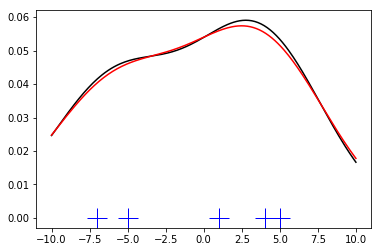

In [173]:
from scipy import stats
import matplotlib.pyplot as plt

x1 = np.array([-7, -5, 1, 4, 5], dtype=np.float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
x_eval = np.linspace(-10, 10, num=200)
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'r-', label="Silverman's Rule")

plt.show()

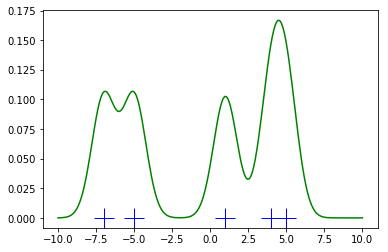

In [171]:
def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
kde3 = stats.gaussian_kde(x1, bw_method=my_kde_bandwidth)
ax.plot(x_eval, kde3(x_eval), 'g-', label="With smaller BW")

plt.show()

In [213]:
np.random.normal(scale=.5,size=10)

array([-0.02703305,  0.44201391, -0.71455311, -0.70062292,  0.13091246,
       -0.00611855, -0.24560597,  0.06100473, -0.15780208,  0.21589157])

In [227]:
X

array([[-2.90110033, -2.90110033, -2.90110033, ..., -2.90110033,
        -2.90110033, -2.90110033],
       [-2.8425753 , -2.8425753 , -2.8425753 , ..., -2.8425753 ,
        -2.8425753 , -2.8425753 ],
       [-2.78405027, -2.78405027, -2.78405027, ..., -2.78405027,
        -2.78405027, -2.78405027],
       ...,
       [ 2.7758276 ,  2.7758276 ,  2.7758276 , ...,  2.7758276 ,
         2.7758276 ,  2.7758276 ],
       [ 2.83435263,  2.83435263,  2.83435263, ...,  2.83435263,
         2.83435263,  2.83435263],
       [ 2.89287766,  2.89287766,  2.89287766, ...,  2.89287766,
         2.89287766,  2.89287766]])

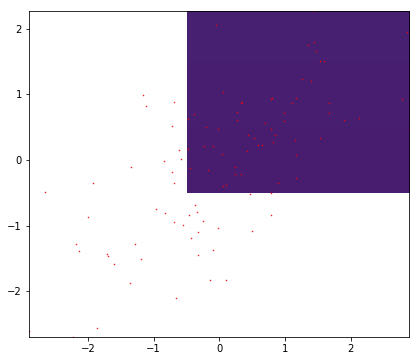

In [221]:
def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

##>>>
m1, m2 = measure(100)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
##Then we apply the KDE to the data:

##>>>
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)
##Finally we plot the estimated bivariate distribution as a colormap, and plot the individual data points on top.

##>>>
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
##>>>
#ax.imshow(np.rot90(Z), cmap=plt.cm.Accent,
#          extent=[xmin, xmax, ymin, ymax])
ax.imshow(Z)
ax.plot(m1, m2, 'r.', markersize=1)

##>>>
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

##>>>
plt.show()


In [182]:
plt.cm.

In [4]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [5]:
import numpy as np
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

NameError: name 'stats' is not defined

## inline if

In [ ]:
[y for y in
[x for x in 
[d for d in range(1000,2000) if d%7==0]
if x%7==0]
if y%17==0]